In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'../data/smartwatches.csv')
df.head()

,Unnamed: 0,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g


In [3]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g


In [4]:
df.shape

(450, 15)

In [5]:
train_df = df.sample(frac=0.8, random_state=42)
test_df = df.drop(train_df.index)

In [6]:
train_df.reset_index(drop=True, inplace=True)
train_df.head()

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,zebronics,2949.0,4199.0,29.768993,3.1,10.0,LEATHER fit-650,Oval,Black,Leather,Yes,NaN,Yes,2.7 inches,NaN
1,fire-boltt,6999.0,15999.0,56.253516,2.6,NaN,bsw020,Circle,Brown,Silicon,Yes,8.0,Yes,1.4 inches,NaN
2,fire-boltt,2499.0,11999.0,79.173264,4.1,1990.0,BSW070,NaN,NaN,NaN,Yes,8.0,Yes,1.9 inches,75g +
3,boat,1999.0,7990.0,74.981227,3.6,827.0,NaN,NaN,NaN,NaN,NaN,8.0,Yes,NaN,75g +
4,fire-boltt,2299.0,5999.0,61.676946,2.5,24.0,NINJA PRO MAX,Square,Blue,Silicon,Yes,22.0,Yes,1.6 inches,NaN


In [7]:
train_df.shape, test_df.shape

((360, 15), (90, 15))

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                360 non-null    object 
 1   Current Price        354 non-null    float64
 2   Original Price       304 non-null    float64
 3   Discount Percentage  304 non-null    float64
 4   Rating               356 non-null    float64
 5   Number OF Ratings    315 non-null    float64
 6   Model Name           330 non-null    object 
 7   Dial Shape           260 non-null    object 
 8   Strap Color          260 non-null    object 
 9   Strap Material       304 non-null    object 
 10  Touchscreen          329 non-null    object 
 11  Battery Life (Days)  330 non-null    float64
 12  Bluetooth            355 non-null    object 
 13  Display Size         333 non-null    object 
 14  Weight               211 non-null    object 
dtypes: float64(6), object(9)
memory usage: 4

In [9]:
train_df.isnull().sum()

Brand                    0
Current Price            6
Original Price          56
Discount Percentage     56
Rating                   4
Number OF Ratings       45
Model Name              30
Dial Shape             100
Strap Color            100
Strap Material          56
Touchscreen             31
Battery Life (Days)     30
Bluetooth                5
Display Size            27
Weight                 149
dtype: int64

In [10]:
train_df['Current Price'].dtype

dtype('float64')

In [11]:
numerical_data = [column for column in train_df.columns if train_df[column].dtype!='O']
categorical_data = [column for column in train_df.columns if train_df[column].dtype=='O']

numerical_data, categorical_data

(['Current Price',
  'Original Price',
  'Discount Percentage',
  'Rating',
  'Number OF Ratings',
  'Battery Life (Days)'],
 ['Brand',
  'Model Name',
  'Dial Shape',
  'Strap Color',
  'Strap Material',
  'Touchscreen',
  'Bluetooth',
  'Display Size',
  'Weight'])

In [12]:
train_df['Weight'] = train_df['Weight'].replace('20 - 35 g', np.mean([20, 35]))
train_df['Weight'] = train_df['Weight'].replace('35 - 50 g', np.mean([35, 50]))
train_df['Weight'] = train_df['Weight'].replace('50 - 75 g', np.mean([50, 75]))
train_df['Weight'] = train_df['Weight'].replace('75g +', 75)
train_df['Weight'] = train_df['Weight'].replace('<= 20 g', 20)

numerical_data.append('Weight')
list(set(numerical_data))

categorical_data.remove('Weight')
list(set(categorical_data))

C:\Users\dasna\AppData\Local\Temp\ipykernel_16136\548622978.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['Weight'] = train_df['Weight'].replace('<= 20 g', 20)


['Dial Shape',
 'Bluetooth',
 'Strap Material',
 'Touchscreen',
 'Brand',
 'Strap Color',
 'Model Name',
 'Display Size']

{'amazfit': 31.25,
 'ambrane': 8.75,
 'apple': 24.78,
 'boat': 26.21,
 'crossbeats': 27.5,
 'dizo': 42.02,
 'fire-boltt': 19.74,
 'fitbit': 10.44,
 'fossil': 3.95,
 'garmin': 17.14,
 'gizmore': 45.14,
 'hammer': 75.0,
 'honor': 28.25,
 'huawei': 20.0,
 'noise': 24.84,
 'pebble': 27.24,
 'samsung': 30.0,
 'zebronics': 34.2}

In [13]:
train_df['Display Size'] = train_df['Display Size'].fillna('0.0 inches')
train_df['Display Size'] = train_df['Display Size'].str.replace(' inches', '')
train_df['Display Size'] = train_df['Display Size'].astype('float')
train_df['Display Size'].dtype

numerical_data.append('Display Size')
numerical_data = list(set(numerical_data))

categorical_data.remove('Display Size')
categorical_data = list(set(categorical_data))

In [ ]:
train_df[numerical_data].head()

,Original Price,Rating,Number OF Ratings,Battery Life (Days),Weight,Current Price,Discount Percentage,Display Size
0,4199.0,3.1,10.0,NaN,NaN,2949.0,29.768993,2.7
1,15999.0,2.6,NaN,8.0,NaN,6999.0,56.253516,1.4
2,11999.0,4.1,1990.0,8.0,75.0,2499.0,79.173264,1.9
3,7990.0,3.6,827.0,8.0,75.0,1999.0,74.981227,0.0
4,5999.0,2.5,24.0,22.0,NaN,2299.0,61.676946,1.6


In [15]:
train_df[categorical_data].head()

,Dial Shape,Bluetooth,Strap Material,Touchscreen,Brand,Strap Color,Model Name
0,Oval,Yes,Leather,Yes,zebronics,Black,LEATHER fit-650
1,Circle,Yes,Silicon,Yes,fire-boltt,Brown,bsw020
2,NaN,Yes,NaN,Yes,fire-boltt,NaN,BSW070
3,NaN,Yes,NaN,NaN,boat,NaN,NaN
4,Square,Yes,Silicon,Yes,fire-boltt,Blue,NINJA PRO MAX


In [16]:
train_df[numerical_data].describe().T

,count,mean,std,min,25%,50%,75%,max
Original Price,304.0,14415.835526,15613.457236,1669.000000,5999.000000,7994.500000,17996.00000,96390.00000
Rating,356.0,4.027528,0.556828,1.000000,3.900000,4.100000,4.30000,5.00000
Number OF Ratings,315.0,10671.815873,27575.956948,1.000000,55.000000,830.000000,7576.50000,275607.00000
Battery Life (Days),330.0,14.181970,7.661878,0.750000,8.000000,17.500000,22.00000,22.00000
Weight,211.0,45.177725,21.281792,20.000000,27.500000,42.500000,75.00000,75.00000
Current Price,354.0,12514.378531,16914.978666,1199.000000,2126.000000,3999.000000,17367.25000,98990.00000
Discount Percentage,304.0,47.955347,24.696899,-79.688436,33.177427,53.068408,66.67778,91.00455
Display Size,360.0,1.710000,2.875961,0.000000,1.200000,1.500000,1.80000,35.90000


In [17]:
train_df[numerical_data].corr()

,Original Price,Rating,Number OF Ratings,Battery Life (Days),Weight,Current Price,Discount Percentage,Display Size
Original Price,1.000000,0.325818,-0.180650,-0.132527,-0.180686,0.971497,-0.479494,0.003392
Rating,0.325818,1.000000,0.085250,-0.102289,-0.289915,0.397179,-0.191073,0.123365
Number OF Ratings,-0.180650,0.085250,1.000000,0.009617,0.114343,-0.195773,0.235221,-0.028830
Battery Life (Days),-0.132527,-0.102289,0.009617,1.000000,-0.179963,0.030352,-0.011792,0.028803
Weight,-0.180686,-0.289915,0.114343,-0.179963,1.000000,-0.314660,0.189762,-0.041004
Current Price,0.971497,0.397179,-0.195773,0.030352,-0.314660,1.000000,-0.602668,0.009663
Discount Percentage,-0.479494,-0.191073,0.235221,-0.011792,0.189762,-0.602668,1.000000,-0.022797
Display Size,0.003392,0.123365,-0.028830,0.028803,-0.041004,0.009663,-0.022797,1.000000


In [18]:
train_df[numerical_data].skew()

Original Price         2.734265
Rating                -1.589043
Number OF Ratings      5.467630
Battery Life (Days)   -0.190298
Weight                 0.393315
Current Price          2.301689
Discount Percentage   -0.983632
Display Size           8.439466
dtype: float64

In [19]:
# import ydata_profiling as pp

# file = pp.ProfileReport(train_df)
# file

In [20]:
# from pathlib import Path
# file.to_file('data_profile.html')

In [21]:
train_df[categorical_data].head()

,Dial Shape,Bluetooth,Strap Material,Touchscreen,Brand,Strap Color,Model Name
0,Oval,Yes,Leather,Yes,zebronics,Black,LEATHER fit-650
1,Circle,Yes,Silicon,Yes,fire-boltt,Brown,bsw020
2,NaN,Yes,NaN,Yes,fire-boltt,NaN,BSW070
3,NaN,Yes,NaN,NaN,boat,NaN,NaN
4,Square,Yes,Silicon,Yes,fire-boltt,Blue,NINJA PRO MAX


In [22]:
train_df['Discount Percentage'] = train_df['Discount Percentage'].replace(np.nan, 0)

In [23]:
from scipy.stats import f_oneway

important_columns = []
for column in categorical_data:
    CategoryGroupLists = train_df.groupby(column)['Discount Percentage'].apply(list)   
    AnnovaResults = f_oneway(*CategoryGroupLists)
    print(f'{column} : P-Value for annova is: {AnnovaResults[1]}')
    if AnnovaResults[1]<0.05:
        important_columns.append(column)

print(important_columns)

Dial Shape : P-Value for annova is: 4.923624484675851e-07
Bluetooth : P-Value for annova is: 0.012719486225170456
Strap Material : P-Value for annova is: 1.3197685254387245e-05
Touchscreen : P-Value for annova is: 1.7122207383705872e-06
Brand : P-Value for annova is: 3.4392531193242896e-68
Strap Color : P-Value for annova is: 0.148881919021761
Model Name : P-Value for annova is: 4.4056347987952183e-16
['Dial Shape', 'Bluetooth', 'Strap Material', 'Touchscreen', 'Brand', 'Model Name']


In [24]:
train_df['Strap Material'] = train_df['Strap Material'].replace(np.nan, 'Other')
train_df['Dial Shape'] = train_df['Dial Shape'].replace(np.nan, 'Other')
train_df['Model Name'] = train_df['Model Name'].replace(np.nan, 'Other')
train_df['Brand'] = train_df['Brand'].replace(np.nan, 'Other')
train_df['Strap Color'] = train_df['Strap Color'].replace(np.nan, 'Other')
train_df['Bluetooth'] = train_df['Bluetooth'].replace(np.nan, 'No')
train_df['Touchscreen'] = train_df['Touchscreen'].replace(np.nan, 'No')

In [25]:
train_df[important_columns].head()

,Dial Shape,Bluetooth,Strap Material,Touchscreen,Brand,Model Name
0,Oval,Yes,Leather,Yes,zebronics,LEATHER fit-650
1,Circle,Yes,Silicon,Yes,fire-boltt,bsw020
2,Other,Yes,Other,Yes,fire-boltt,BSW070
3,Other,Yes,Other,No,boat,Other
4,Square,Yes,Silicon,Yes,fire-boltt,NINJA PRO MAX


In [26]:
bluetoothmap = {'Yes':1, 'No':0}
train_df['Bluetooth'] = train_df['Bluetooth'].map(bluetoothmap)
train_df['Touchscreen'] = train_df['Touchscreen'].map(bluetoothmap)
train_df[important_columns].head()

,Dial Shape,Bluetooth,Strap Material,Touchscreen,Brand,Model Name
0,Oval,1,Leather,1,zebronics,LEATHER fit-650
1,Circle,1,Silicon,1,fire-boltt,bsw020
2,Other,1,Other,1,fire-boltt,BSW070
3,Other,1,Other,0,boat,Other
4,Square,1,Silicon,1,fire-boltt,NINJA PRO MAX


In [27]:
important_columns.append('Discount Percentage')
train_df[important_columns].head()

,Dial Shape,Bluetooth,Strap Material,Touchscreen,Brand,Model Name,Discount Percentage
0,Oval,1,Leather,1,zebronics,LEATHER fit-650,29.768993
1,Circle,1,Silicon,1,fire-boltt,bsw020,56.253516
2,Other,1,Other,1,fire-boltt,BSW070,79.173264
3,Other,1,Other,0,boat,Other,74.981227
4,Square,1,Silicon,1,fire-boltt,NINJA PRO MAX,61.676946


In [28]:
for column in important_columns[:-1]:
    target_mean = train_df[important_columns].groupby(column)['Discount Percentage'].mean()
    train_df[column] = train_df[column].map(target_mean)

train_df.head()


,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,48.363029,2949.0,4199.0,29.768993,3.1,10.0,29.768993,29.768993,Black,27.539326,42.234900,NaN,41.214346,2.7,NaN
1,64.257861,6999.0,15999.0,56.253516,2.6,NaN,56.253516,27.212797,Brown,42.535842,42.234900,8.0,41.214346,1.4,NaN
2,64.257861,2499.0,11999.0,79.173264,4.1,1990.0,79.173264,55.333228,Other,48.629612,42.234900,8.0,41.214346,1.9,75.0
3,68.953107,1999.0,7990.0,74.981227,3.6,827.0,45.336483,55.333228,Other,48.629612,29.190348,8.0,41.214346,0.0,75.0
4,64.257861,2299.0,5999.0,61.676946,2.5,24.0,61.676946,48.069986,Blue,42.535842,42.234900,22.0,41.214346,1.6,NaN


In [29]:
train_df[important_columns].isna().sum()

Dial Shape             0
Bluetooth              0
Strap Material         0
Touchscreen            0
Brand                  0
Model Name             0
Discount Percentage    0
dtype: int64

In [30]:
train_df[numerical_data].isna().sum()

Original Price          56
Rating                   4
Number OF Ratings       45
Battery Life (Days)     30
Weight                 149
Current Price            6
Discount Percentage      0
Display Size             0
dtype: int64

In [31]:
train_df[numerical_data].head()

,Original Price,Rating,Number OF Ratings,Battery Life (Days),Weight,Current Price,Discount Percentage,Display Size
0,4199.0,3.1,10.0,NaN,NaN,2949.0,29.768993,2.7
1,15999.0,2.6,NaN,8.0,NaN,6999.0,56.253516,1.4
2,11999.0,4.1,1990.0,8.0,75.0,2499.0,79.173264,1.9
3,7990.0,3.6,827.0,8.0,75.0,1999.0,74.981227,0.0
4,5999.0,2.5,24.0,22.0,NaN,2299.0,61.676946,1.6


In [32]:
train_df[numerical_data].skew()

Original Price         2.734265
Rating                -1.589043
Number OF Ratings      5.467630
Battery Life (Days)   -0.190298
Weight                 0.393315
Current Price          2.301689
Discount Percentage   -0.469188
Display Size           8.439466
dtype: float64

In [33]:
train_df['Rating']=train_df['Rating'].replace(np.nan, train_df['Rating'].median())
train_df['Battery Life (Days)'] = train_df['Battery Life (Days)'].replace(np.nan, train_df['Battery Life (Days)'].mean())
train_df['Current Price'] = train_df['Current Price'].replace(np.nan, train_df['Current Price'].median())
train_df['Number OF Ratings'] = train_df['Number OF Ratings'].replace(np.nan, train_df['Number OF Ratings'].median())
train_df['Weight'] = train_df['Weight'].replace(np.nan, train_df['Weight'].mean())
train_df['Original Price'] = train_df['Original Price'].replace(np.nan, train_df['Original Price'].mean())

train_df[numerical_data].isna().sum()

Original Price         0
Rating                 0
Number OF Ratings      0
Battery Life (Days)    0
Weight                 0
Current Price          0
Discount Percentage    0
Display Size           0
dtype: int64

In [34]:
train_df.head()

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,48.363029,2949.0,4199.0,29.768993,3.1,10.0,29.768993,29.768993,Black,27.539326,42.234900,14.18197,41.214346,2.7,45.177725
1,64.257861,6999.0,15999.0,56.253516,2.6,830.0,56.253516,27.212797,Brown,42.535842,42.234900,8.00000,41.214346,1.4,45.177725
2,64.257861,2499.0,11999.0,79.173264,4.1,1990.0,79.173264,55.333228,Other,48.629612,42.234900,8.00000,41.214346,1.9,75.000000
3,68.953107,1999.0,7990.0,74.981227,3.6,827.0,45.336483,55.333228,Other,48.629612,29.190348,8.00000,41.214346,0.0,75.000000
4,64.257861,2299.0,5999.0,61.676946,2.5,24.0,61.676946,48.069986,Blue,42.535842,42.234900,22.00000,41.214346,1.6,45.177725


In [35]:
train_df = train_df.drop(columns=['Strap Color'], axis=1)
train_df.head()

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,48.363029,2949.0,4199.0,29.768993,3.1,10.0,29.768993,29.768993,27.539326,42.234900,14.18197,41.214346,2.7,45.177725
1,64.257861,6999.0,15999.0,56.253516,2.6,830.0,56.253516,27.212797,42.535842,42.234900,8.00000,41.214346,1.4,45.177725
2,64.257861,2499.0,11999.0,79.173264,4.1,1990.0,79.173264,55.333228,48.629612,42.234900,8.00000,41.214346,1.9,75.000000
3,68.953107,1999.0,7990.0,74.981227,3.6,827.0,45.336483,55.333228,48.629612,29.190348,8.00000,41.214346,0.0,75.000000
4,64.257861,2299.0,5999.0,61.676946,2.5,24.0,61.676946,48.069986,42.535842,42.234900,22.00000,41.214346,1.6,45.177725


In [36]:
input = list(train_df.columns)
input.remove('Discount Percentage')
print(input)

['Brand', 'Current Price', 'Original Price', 'Rating', 'Number OF Ratings', 'Model Name', 'Dial Shape', 'Strap Material', 'Touchscreen', 'Battery Life (Days)', 'Bluetooth', 'Display Size', 'Weight']


In [37]:
X = train_df[input]
X.head()

,Brand,Current Price,Original Price,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,48.363029,2949.0,4199.0,3.1,10.0,29.768993,29.768993,27.539326,42.234900,14.18197,41.214346,2.7,45.177725
1,64.257861,6999.0,15999.0,2.6,830.0,56.253516,27.212797,42.535842,42.234900,8.00000,41.214346,1.4,45.177725
2,64.257861,2499.0,11999.0,4.1,1990.0,79.173264,55.333228,48.629612,42.234900,8.00000,41.214346,1.9,75.000000
3,68.953107,1999.0,7990.0,3.6,827.0,45.336483,55.333228,48.629612,29.190348,8.00000,41.214346,0.0,75.000000
4,64.257861,2299.0,5999.0,2.5,24.0,61.676946,48.069986,42.535842,42.234900,22.00000,41.214346,1.6,45.177725


In [38]:
y = train_df['Discount Percentage']
y.head()

0    29.768993
1    56.253516
2    79.173264
3    74.981227
4    61.676946
Name: Discount Percentage, dtype: float64

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

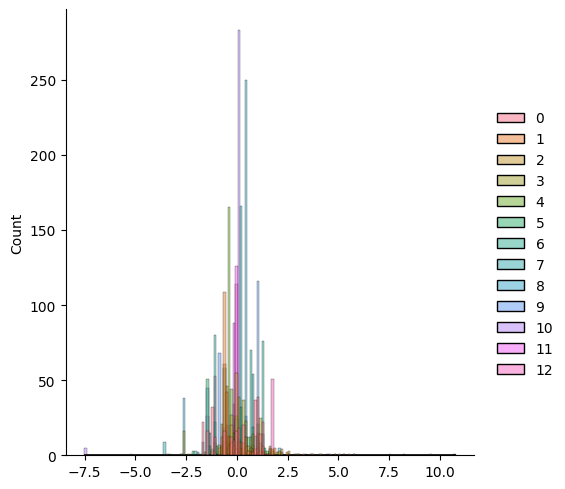

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

sns.displot(X_train)

In [41]:
X_train.shape

(288, 13)

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(scaler.transform(X_test))

res = r2_score(y_true=y_test, y_pred=y_pred)
print(res)

0.9237018667825933


In [43]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(scaler.transform(X_test))

res = r2_score(y_true=y_test, y_pred=y_pred)
print(res)

0.8868704132941735


In [44]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(scaler.transform(X_test))

res = r2_score(y_true=y_test, y_pred=y_pred)
print(res)

0.9590768889114318


In [45]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(scaler.transform(X_test))

res = r2_score(y_true=y_test, y_pred=y_pred)
print(res)

0.9484778404263554


In [46]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score

en_model = ElasticNet()
en_model.fit(X_train, y_train)

y_pred = en_model.predict(scaler.transform(X_test))

res = r2_score(y_true=y_test, y_pred=y_pred)
print(res)

0.8491295656173358


In [47]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(en_model, X_train, y_train, cv=5, scoring='r2')
print(f'cross_val_score: {score}, score_mean: {score.mean()}, score_std: {score.std()}')

cross_val_score: [0.56803784 0.89302315 0.84124552 0.88459084 0.87104742], score_mean: 0.8115889527119526, score_std: 0.12303882967726339


In [48]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'l1_ratio': [.1, .5, .7, .9, .95, .99, 1]
}

grid_search = GridSearchCV(estimator=en_model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_param = grid_search.best_params_

best_model = ElasticNet(**best_param)
best_model.fit(X_train, y_train)


y_pred = best_model.predict(scaler.transform(X_test))

res = r2_score(y_true=y_test, y_pred=y_pred)
print(res)

0.9114001303251282


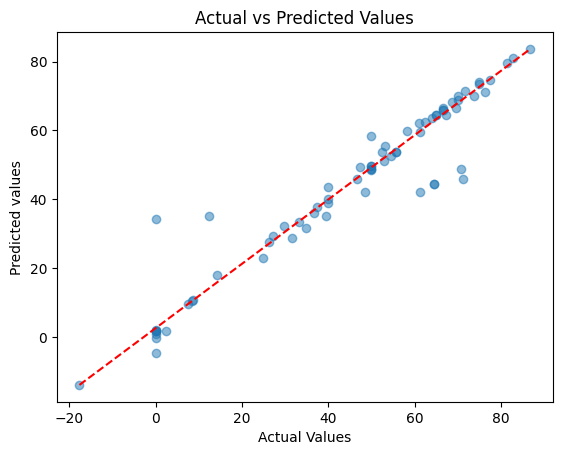

In [49]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], 'r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted Values')
plt.show()

In [50]:
import pickle

pickle.dump(scaler, open(r'scaler.pkl', 'wb'))
pickle.dump(best_model, open(r'model.pkl', 'wb'))